In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os 
import shutil
import random
import glob

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#Organize data into train, valid, test dirs
os.chdir(r'C:\Users\Mubarak\Downloads\catadog')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat' )
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog' )
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat' )
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog' )
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat' )
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog' )
        
os.chdir('.../../')

In [3]:
train_path = r'C:\Users\Mubarak\Downloads\catadog\train'
valid_path = r'C:\Users\Mubarak\Downloads\catadog\valid'
test_path = r'C:\Users\Mubarak\Downloads\catadog\test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
#verfying
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2


In [6]:
#grab a single batch
imgs, labels = next(train_batches)

In [7]:
#plot images from tf website
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

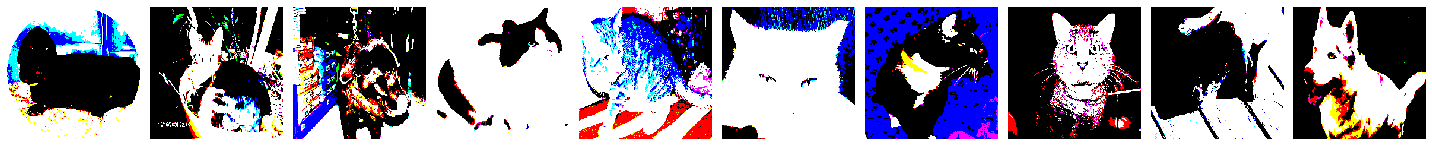

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
model = Sequential ([
        Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 80s - loss: 19.6020 - accuracy: 0.5900 - val_loss: 6.3179 - val_accuracy: 0.6400
Epoch 2/10
100/100 - 76s - loss: 3.8230 - accuracy: 0.7340 - val_loss: 4.8484 - val_accuracy: 0.6200
Epoch 3/10
100/100 - 79s - loss: 1.9288 - accuracy: 0.8090 - val_loss: 3.3753 - val_accuracy: 0.6550
Epoch 4/10
100/100 - 80s - loss: 0.5672 - accuracy: 0.9030 - val_loss: 3.7778 - val_accuracy: 0.6300
Epoch 5/10
100/100 - 82s - loss: 0.0645 - accuracy: 0.9780 - val_loss: 3.6809 - val_accuracy: 0.6550
Epoch 6/10
100/100 - 77s - loss: 0.0090 - accuracy: 0.9940 - val_loss: 3.4952 - val_accuracy: 0.6550
Epoch 7/10
100/100 - 80s - loss: 9.0464e-04 - accuracy: 1.0000 - val_loss: 3.5053 - val_accuracy: 0.6500
Epoch 8/10
100/100 - 81s - loss: 4.7459e-04 - accuracy: 1.0000 - val_loss: 3.5089 - val_accuracy: 0.6550
Epoch 9/10
100/100 - 79s - loss: 3.7031e-04 - accuracy: 1.0000 - val_loss: 3.5043 - val_accuracy: 0.6500
Epoch 10/10
100/100 - 81s - loss: 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

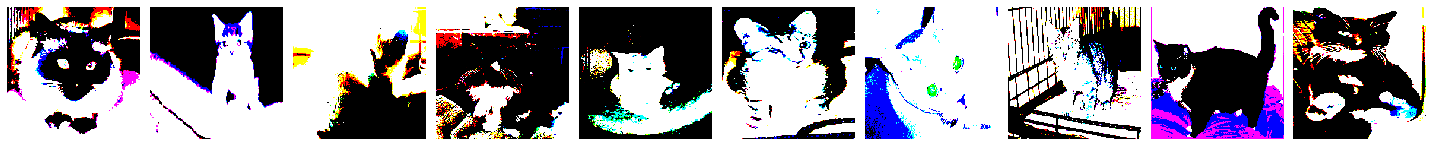

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
#Predict

test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [14]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
predictions = model.predict(x=test_batches, verbose=0)

In [16]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [17]:
cm= confusion_matrix(y_true=test_batches.classes, y_pred = np.argmax(predictions, axis=-1))

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    print(cm)
    
    tresh=cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > tresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [19]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without normalization
[[31 19]
 [17 33]]


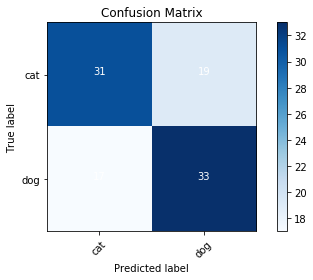

In [20]:
cm_plot_labels =['cat', 'dog']
plot_confusion_matrix(cm=cm, classes= cm_plot_labels, title='Confusion Matrix')

In [21]:
#overfitted

In [22]:
# VGG16 model fine-tuning
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [23]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [25]:
model = Sequential()
for layer in vgg16_model.layers[:-1]: #till the -1
    model.add(layer)

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
for layer in model.layers:
    layer.trainable=False

In [29]:
model.add(Dense(units=2, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [31]:
#Train the fine-tuned VGG16

In [33]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(x=train_batches, validation_data= valid_batches, epochs=5, verbose=2)

Train for 100 steps, validate for 20 steps
Epoch 1/5
100/100 - 452s - loss: 0.3992 - accuracy: 0.8230 - val_loss: 0.1474 - val_accuracy: 0.9350
Epoch 2/5
100/100 - 422s - loss: 0.1087 - accuracy: 0.9640 - val_loss: 0.0959 - val_accuracy: 0.9700
Epoch 3/5
100/100 - 637s - loss: 0.0708 - accuracy: 0.9750 - val_loss: 0.0764 - val_accuracy: 0.9700
Epoch 4/5
100/100 - 537s - loss: 0.0503 - accuracy: 0.9830 - val_loss: 0.0705 - val_accuracy: 0.9700
Epoch 5/5
100/100 - 415s - loss: 0.0392 - accuracy: 0.9890 - val_loss: 0.0663 - val_accuracy: 0.9750


In [35]:
assert model.history.get('accuracy')[-1] > 0.95

AttributeError: 'History' object has no attribute 'get'

In [ ]:
#Predict using finetuned VGG16 model

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(testImages)
print(test_labels)

In [ ]:
predictions= model.predict(x=test_batches, verbose=0)

In [ ]:
test_batches.classes

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1)

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat', 'dog']
plot_cinfusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')